In [1]:
import requests

url = "https://english-premiere-league1.p.rapidapi.com/tables"

querystring = {"season":"2023"}

headers = {
	"x-rapidapi-key": "040a1564ffmsh64085c296a29c4ap1d9d64jsnefa1dc17f9a0",
	"x-rapidapi-host": "english-premiere-league1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'uid': 's:600~l:700', 'id': '23', 'name': 'English Premier League', 'abbreviation': 'Premier League', 'children': [{'uid': 's:600~l:700~g:1', 'id': '1', 'name': 'English Premier League 2023-2024', 'abbreviation': '2023-2024', 'standings': {'id': '0', 'name': 'overall', 'displayName': 'Standings', 'links': [{'language': 'en-US', 'rel': ['standings', 'desktop'], 'href': 'https://www.espn.com/soccer/table/_/league/eng.1', 'text': 'Full Table', 'shortText': 'Standings', 'isExternal': False, 'isPremium': False}], 'season': 2023, 'seasonType': 1, 'seasonDisplayName': '2023-24 English Premier League', 'entries': [{'team': {'id': '382', 'uid': 's:600~t:382', 'location': 'Manchester City', 'name': 'Manchester City', 'abbreviation': 'MNC', 'displayName': 'Manchester City', 'shortDisplayName': 'Man City', 'isActive': True, 'logos': [{'href': 'https://a.espncdn.com/i/teamlogos/soccer/500/382.png', 'width': 500, 'height': 500, 'alt': '', 'rel': ['full', 'default'], 'lastUpdated': '2019-05-08T16:07

# Generating a Table for the Top 20 Teams in the 2023 Season

In [2]:
import requests
import pandas as pd
import json
import os
import time

# API Configuration
url = "https://english-premiere-league1.p.rapidapi.com/tables"
querystring = {"season": "2023"}
headers = {
    "x-rapidapi-key": "040a1564ffmsh64085c296a29c4ap1d9d64jsnefa1dc17f9a0",
    "x-rapidapi-host": "english-premiere-league1.p.rapidapi.com"
}


# Function to fetch data with retries
def fetch_api_data(url, headers, params, retries=3, delay=5):
    for attempt in range(retries):
        try:
            print(f" Attempt {attempt + 1}: Fetching data...")
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            print(" API request successful!")
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f" API request failed: {e}")
            if attempt < retries - 1:
                print(f" Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                print(" Max retries reached. Exiting.")
                exit()


# Fetch data
data = fetch_api_data(url, headers, querystring)

# Extract standings from nested structure
standings = []
if "children" in data:
    for child in data["children"]:
        if "standings" in child and "entries" in child["standings"]:
            standings = child["standings"]["entries"]
            break  # Found the data, exit loop

# Ensure standings exist
if not standings or len(standings) < 20:
    print(f"\n Error: Could not find 20 teams in the API response (found {len(standings)}).")
    exit()

print(f"\n Found {len(standings)} teams in standings.")

# Process standings data
teams_data = []
for team in standings:
    stats = {stat.get("name", "unknown"): stat.get("value", 0) for stat in team.get("stats", [])}

    team_info = {
        "Position": team.get("note", {}).get("rank", "N/A"),
        "Team": team.get("team", {}).get("displayName", "Unknown"),
        "Played": stats.get("gamesPlayed", 0),
        "Wins": stats.get("wins", 0),
        "Draws": stats.get("ties", 0),  # API may use "ties" instead of "draws"
        "Losses": stats.get("losses", 0),
        "GF": stats.get("pointsFor", stats.get("goalsFor", 0)),
        "GA": stats.get("pointsAgainst", stats.get("goalsAgainst", 0)),
        "GD": stats.get("pointDifferential", stats.get("goalDifference", 0)),
        "Points": stats.get("points", 0),
    }
    teams_data.append(team_info)

# Create DataFrame
df = pd.DataFrame(teams_data)

# Convert Position to numeric for sorting
df["Position"] = pd.to_numeric(df["Position"], errors="coerce")

# Find missing positions and assign new ones sequentially
missing_positions = df["Position"].isna().sum()
if missing_positions > 0:
    missing_values = list(range(7, 7 + missing_positions))  # Generate missing ranks
    df.loc[df["Position"].isna(), "Position"] = missing_values

df = df.sort_values("Position", ascending=True)
df = df.reset_index(drop=True)

df = df.sort_values("Position", ascending=True)  # Ensure ascending order
df = df.reset_index(drop=True)  # Reset index after sorting


# Displays 20 rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

# Display table
print("\n --- Premier League 2023-24 Standings (Top 20 Teams) --- ")
print(df.to_string(index=False))

 Attempt 1: Fetching data...
 API request successful!

 Found 20 teams in standings.

 --- Premier League 2023-24 Standings (Top 20 Teams) --- 
 Position                    Team  Played  Wins  Draws  Losses  GF  GA  GD  Points
      1.0         Manchester City      38    28      7       3  96  34  62      91
      2.0                 Arsenal      38    28      5       5  91  29  62      89
      3.0               Liverpool      38    24     10       4  86  41  45      82
      4.0             Aston Villa      38    20      8      10  76  61  15      68
      5.0       Tottenham Hotspur      38    20      6      12  74  61  13      66
      6.0                 Chelsea      38    18      9      11  77  63  14      63
      7.0        Newcastle United      38    18      6      14  85  62  23      60
      8.0       Manchester United      38    18      6      14  57  58  -1      60
      8.0         West Ham United      38    14     10      14  60  74 -14      52
      9.0          Crystal


# Computing Key Metrics For Top Teams and Visualization

Getting Premier League standings data from an API and calculates mean, median, min, max, and standard deviation for:
* Points (P)
* Wins (W)
* Losses (L)
* Draws (D)
* Goals For (GF)
* Goals Against (GA)
* Goal Difference (GD)

- The above is computed for the following teams: Manchester City, Arsenal, Manchester United, Liverpool, and Chelsea; from 2017-2023



In [3]:
import requests

# API Configuration
url = "https://english-premiere-league1.p.rapidapi.com/tables"
querystring = {"season": "2023"}
headers = {
    "x-rapidapi-key": "040a1564ffmsh64085c296a29c4ap1d9d64jsnefa1dc17f9a0",
	"x-rapidapi-host": "english-premiere-league1.p.rapidapi.com"
}

# Fetch data
response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    print(" Data fetched successfully!")
else:
    print(f" Error: {response.status_code} - {response.text}")

 Data fetched successfully!


Fetching data for season 2017...
Fetching data for season 2018...
Fetching data for season 2019...
Fetching data for season 2020...
Fetching data for season 2021...
Fetching data for season 2022...
Fetching data for season 2023...

 All Seasons Team Data:


,Season,Team,Rank,Points,Wins,Losses,Draws,GF,GA,GD
0,2017-18,Manchester City,1,100,32,2,4,106,27,79
1,2017-18,Manchester United,2,81,25,7,6,68,28,40
2,2017-18,Liverpool,4,75,21,5,12,84,38,46
3,2017-18,Chelsea,5,70,21,10,7,62,38,24
4,2017-18,Arsenal,6,63,19,13,6,74,51,23
...,...,...,...,...,...,...,...,...,...,...
30,2023-24,Manchester City,1,91,28,3,7,96,34,62
31,2023-24,Arsenal,2,89,28,5,5,91,29,62
32,2023-24,Liverpool,3,82,24,4,10,86,41,45
33,2023-24,Chelsea,6,63,18,11,9,77,63,14



 Team Performance Summary (2017-2023):


,Team,Seasons,Avg Points,Avg Wins,Avg Losses,Avg Draws,Avg GF,Avg GA,Avg GD,Best Rank,Worst Rank,Points Std Dev,GF Std Dev,GA Std Dev
0,Manchester City,7,91.142857,28.857143,4.571429,4.571429,96.428571,30.000000,66.428571,1,2,6.618876,7.276839,4.618802
1,Arsenal,7,70.285714,21.142857,10.000000,6.857143,71.142857,44.142857,27.000000,2,8,12.134171,14.622227,7.967195
2,Manchester United,7,68.571429,20.000000,9.428571,8.571429,63.428571,45.714286,17.714286,2,8,8.403514,6.241184,11.294752
3,Liverpool,7,83.000000,24.857143,4.714286,8.428571,83.000000,35.571429,47.428571,1,5,13.228757,8.755950,9.034326
4,Chelsea,7,65.142857,18.714286,10.285714,9.000000,63.285714,44.285714,19.000000,3,12,10.040395,13.237753,10.919620



 League-Wide Statistics by Season:


Points                             Wins                           \
          mean median min  max        std  mean median min max       std   
Season                                                                     
2017-18   77.8   75.0  63  100  14.060583  23.6   21.0  19  32  5.176872   
2018-19   80.6   72.0  66   98  15.582041  24.6   21.0  19  32  5.941380   
2019-20   73.6   66.0  56   99  16.772000  22.0   20.0  14  32  7.071068   
2020-21   71.4   69.0  61   86   9.396808  21.0   20.0  18  27  3.535534   
2021-22   77.2   74.0  58   93  15.122830  23.2   22.0  16  29  5.357238   
2022-23   71.8   75.0  44   89  17.683325  21.4   23.0  11  28  6.730527   
2023-24   77.0   82.0  60   91  14.577380  23.2   24.0  18  28  5.019960   

           GF                               GA                            
         mean median min  max        std  mean median min max        std  
Season                                                                    
2017-18  78.8   74.0  62  106  17.239490  36.4   38.0  27  51   9.710819  
2018-19  77.0   73.0  63   95  14.352700  37.8   39.0  22  54  15.056560  
2019-20  75.6   69.0  56  102  18.063776  41.2   36.0  33  54   9.257429  
2020-21  67.4   68.0  55   83  11.371016  38.6   39.0  32  44   4.774935  
2021-22  77.4   76.0  57   99  18.902381  38.0   33.0  26  57  13.910428  
2022-23  70.6   75.0  38   94  22.864820  42.6   43.0  33  47   5.727128  
2023-24  81.4   86.0  57   96  15.339492  45.0   41.0  29  63  14.882876

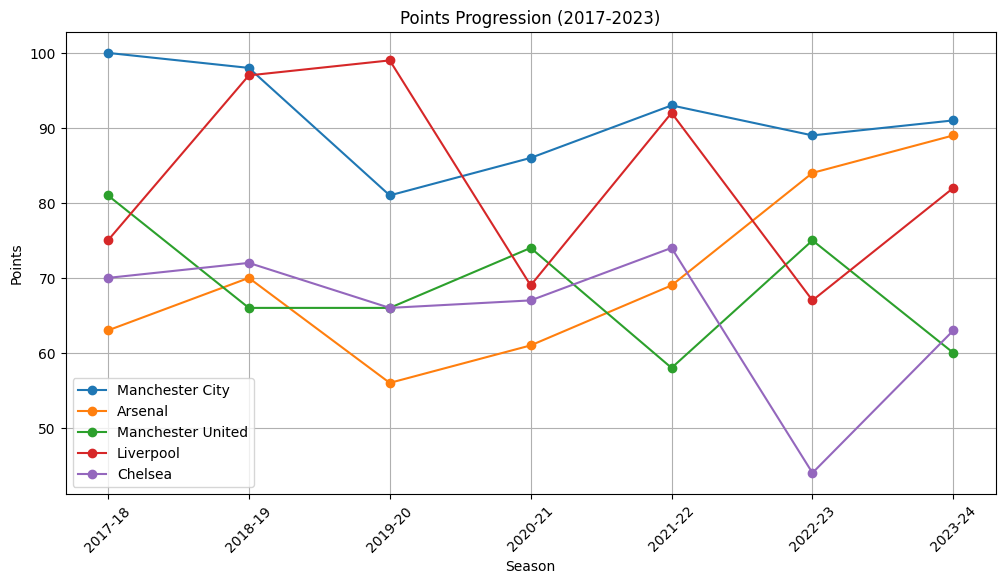

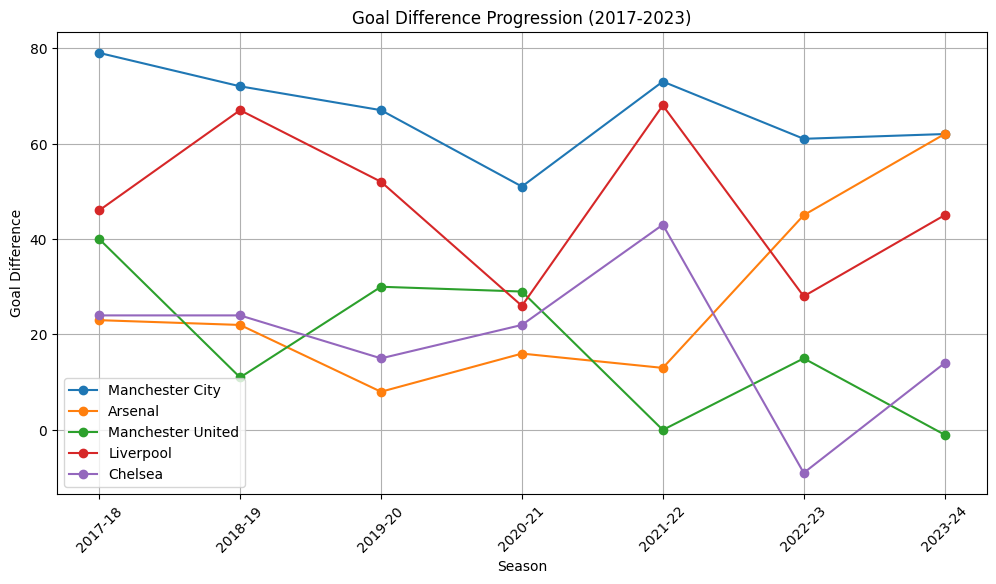

In [4]:
import requests
import pandas as pd
from IPython.display import display

# API configuration
url = "https://english-premiere-league1.p.rapidapi.com/tables"
headers = {
    "x-rapidapi-key": "040a1564ffmsh64085c296a29c4ap1d9d64jsnefa1dc17f9a0",
	"x-rapidapi-host": "english-premiere-league1.p.rapidapi.com"
}

# Teams to analyze
selected_teams = [
    "Manchester City",
    "Arsenal",
    "Manchester United",
    "Liverpool",
    "Chelsea"
]

# Seasons to analyze (2017-2023)
seasons_to_analyze = list(range(2017, 2024))

# Function to extract team stats from API response
def extract_team_stats(season_data):
    team_stats = []
    try:
        standings = season_data["children"][0]["standings"]["entries"]
        for team in standings:
            team_name = team["team"]["name"]
            if team_name in selected_teams:
                stats = {
                    "Team": team_name,
                    "Points": next(s["value"] for s in team["stats"] if s["name"] == "points"),
                    "Wins": next(s["value"] for s in team["stats"] if s["name"] == "wins"),
                    "Losses": next(s["value"] for s in team["stats"] if s["name"] == "losses"),
                    "Draws": next(s["value"] for s in team["stats"] if s["name"] == "ties"),
                    "GF": next(s["value"] for s in team["stats"] if s["name"] == "pointsFor"),
                    "GA": next(s["value"] for s in team["stats"] if s["name"] == "pointsAgainst"),
                    "GD": next(s["value"] for s in team["stats"] if s["name"] == "pointDifferential"),
                    "Rank": next(s["value"] for s in team["stats"] if s["name"] == "rank")
                }
                team_stats.append(stats)
    except (KeyError, IndexError, StopIteration) as e:
        print(f"Error processing season data: {e}")
    return team_stats

# Collect data for all seasons
all_seasons_data = []

for season in seasons_to_analyze:
    print(f"Fetching data for season {season}...")
    response = requests.get(url, headers=headers, params={"season": season})

    if response.status_code == 200:
        season_data = response.json()
        team_stats = extract_team_stats(season_data)

        for stats in team_stats:
            stats["Season"] = f"{season}-{str(season+1)[-2:]}"
            all_seasons_data.append(stats)
    else:
        print(f"Failed to fetch data for season {season}. Status code: {response.status_code}")

# Create DataFrame with all seasons data
df = pd.DataFrame(all_seasons_data)

# Reorder columns
df = df[['Season', 'Team', 'Rank', 'Points', 'Wins', 'Losses', 'Draws', 'GF', 'GA', 'GD']]

# Display raw data
print("\n All Seasons Team Data:")
display(df)

# Calculate statistics for each team across seasons
team_stats_summary = []

for team in selected_teams:
    team_data = df[df['Team'] == team]

    stats = {
        'Team': team,
        'Seasons': len(team_data),
        'Avg Points': team_data['Points'].mean(),
        'Avg Wins': team_data['Wins'].mean(),
        'Avg Losses': team_data['Losses'].mean(),
        'Avg Draws': team_data['Draws'].mean(),
        'Avg GF': team_data['GF'].mean(),
        'Avg GA': team_data['GA'].mean(),
        'Avg GD': team_data['GD'].mean(),
        'Best Rank': team_data['Rank'].min(),
        'Worst Rank': team_data['Rank'].max(),
        'Points Std Dev': team_data['Points'].std(),
        'GF Std Dev': team_data['GF'].std(),
        'GA Std Dev': team_data['GA'].std()
    }
    team_stats_summary.append(stats)

# Create summary DataFrame
summary_df = pd.DataFrame(team_stats_summary)

# Display summary statistics
print("\n Team Performance Summary (2017-2023):")
display(summary_df)

# Calculate league-wide statistics for each season
season_stats = df.groupby('Season').agg({
    'Points': ['mean', 'median', 'min', 'max', 'std'],
    'Wins': ['mean', 'median', 'min', 'max', 'std'],
    'GF': ['mean', 'median', 'min', 'max', 'std'],
    'GA': ['mean', 'median', 'min', 'max', 'std']
})

print("\n League-Wide Statistics by Season:")
display(season_stats)

# Visualization (optional - requires matplotlib)
%matplotlib inline
import matplotlib.pyplot as plt

# Plot points progression
plt.figure(figsize=(12, 6))
for team in selected_teams:
    team_data = df[df['Team'] == team]
    plt.plot(team_data['Season'], team_data['Points'], 'o-', label=team)

plt.title('Points Progression (2017-2023)')
plt.xlabel('Season')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot goal difference progression
plt.figure(figsize=(12, 6))
for team in selected_teams:
    team_data = df[df['Team'] == team]
    plt.plot(team_data['Season'], team_data['GD'], 'o-', label=team)

plt.title('Goal Difference Progression (2017-2023)')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()